# Capstone Project - Data Science @ BrainStation

##  Introduction

This Jupiter notebook forms the core component of my Capstone project under the Data Science Diploma Program at BrainStation, Vancouver. In this notebook, we use base Python together with some of the widely used libraries to investigate, analyse a dataset sourced from loan data released by Lending Club, a US-based peer-to-peer lender. At it's peak, Lending club was largest P2P lender in the world with assets of ~16 billion USD. The dataset contains the features of various loans extended by Lending Club spanning from 2007 and 2018 and the corresponding details of the borrowers, who had availed the loan. The key detail of the loan captured in the dataset is 'loan_status', which has two values 'Fully Paid' or 'Charged Off', which means all these loans have been closed and there are no running loans in this dataset.

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset/code?datasetId=608703&sortBy=voteCount).

In this note, I will be demonstrating how to perform EDA, visualise data, and apply some machine learning techniques to solves problem of prediction.


## Table of Contents
[1. Loading data & checking high-level details](#Step-1:-Loading-data-&-checking-high-level-details) <br>
- [Data Dictionary](#Data-Dictionary)



[2. Verifying assumptions associated with linear regression models](#Step-2:-Verifying-assumptions-associated-with-linear-regression-models) <br>
- [Linearity](#2.1.-Linearity) <br>
- [Independence](#2.2.-Independence-or-No-Multicollienearity)
- [Normality](#2.3.-Residuals-Are-Normally-Distributed)
- [Homoscedasticity](#2.4.-Homoscedasticity)

[3. Variable selection for model](#Step-3:-Variable-selection-for-model) <br>
- [Backward or Top-Down approach](#3.1.-Backward-or-Top-Down-approach)
- [Forward or Bottom-Up approach](#3.2.-Forward-or-Bottom-Up-approach)

[4. Model Diagnostics](#Step-4:-Model-Diagnostics)
- [Residuals](#4.1.-Residuals)
- [Homoscedasticity](#4.2-Homoscedasticity)

[5. Conclusion](#5.-Conclusion)

### Data Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower                                                                    |                                           
| 4    | grade                 | Lending Club assigned loan grade                                                                                      |
| 5    | sub_grade             | Lending Club assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.                                          |   
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. The values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

In [1]:
import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas

# import library to filter warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
raw_df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
# Check for the number of observations and columns.
raw_df.shape

(396030, 27)

Data frame has 396030 rows or observations and 27 columns

In [4]:
pd.set_option('display.max_columns', None) # This option is enabled to look at all the columns in a data frame

In [5]:
raw_df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Datatypes:** Column 'Term' could transformed from object to numeric.

**Extraction of Data from existing columns**: We could extract multiple columns from date column (month and year) and address column (city,state)



In [7]:
# Check for number of unique values for each feature.

raw_df.nunique().sort_values(ascending = False)  # Sort features by the number of unique values in descending order 

address                 393700
emp_title               173105
installment              55706
revol_bal                55622
title                    48817
annual_inc               27197
dti                       4262
loan_amnt                 1397
revol_util                1226
earliest_cr_line           684
int_rate                   566
total_acc                  118
issue_d                    115
open_acc                    61
sub_grade                   35
mort_acc                    33
pub_rec                     20
purpose                     14
emp_length                  11
pub_rec_bankruptcies         9
grade                        7
home_ownership               6
application_type             3
verification_status          3
term                         2
loan_status                  2
initial_list_status          2
dtype: int64

**Observations**

* address -  As against 396,030 rows in the dataframe, there are 393700 addresses. We would have to extract the city and state values
* emp_title - There are 173,105 unique values for employee title. This number is too high for us to analyse. 




In [8]:
raw_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


1. **loan_amount** The average loan is 14111 USD. Min loan amount is 500 USD and max is 40,000 USD
2. **int_rate**	The interest rate on an average is 13.63%

In [9]:
# Checking for null values
print(raw_df.isna().sum().sort_values(ascending = False))

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64


In [10]:
columns_with_nulls = (raw_df.isna().sum(axis=0) * 100 / raw_df.shape[0]).round(2).loc[lambda x: x != 0]

# print percentage of nulls in the columns having null values
print(columns_with_nulls.sort_values(ascending = False))

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dtype: float64


## Handling Null values
* `revol_util` and `pub_rec_bankruptcies` have low percentage of null values. We may remove the rows with null values in these columns
* 




There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. Null values to be handled subsequently. 

In [11]:
raw_df.duplicated().sum() # checking for duplicate rows

0

There are no duplicates rows in the dataset.

In [12]:
print( "Percentage of unique employees titles in the column",  (raw_df['emp_title'].nunique()*100/raw_df['emp_title'].count()).round(1))



#print( "Percentage of unique titles to total vaues of titles",  (raw_df['title'].nunique()*100/raw_df['title'].count()).round(1))


Percentage of unique employees titles in the column 46.4


In [72]:
#raw_df["loan_status"] == 

In [73]:
#raw_df.drop(columns = ['emp_title'], ) # delete columns

46.39% of values in the columns are unique values. Since there are way too many number of uniques values of employment titles, we may have to drop the columns, as it becomes difficult to 'groupby' categories.

The top 10 most freuquent categories of employee titles form only 5.7% of the total count of titles.  Had the most frequent values constituted a good portion of the dataset, we could have filled have classified the remaining values as 'other'

In [13]:
raw_df['emp_length'].unique() 

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

We need to further explore on how to handle missing values in employment length.

In [14]:
raw_df['title'].value_counts()[:5] # Calculating the top 5 most frequently ocurring categories in column 'title'

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: title, dtype: int64

It looks like there are many duplicated categories. For instance, Debt consolidation is captured as different values. We can merge the categories to reduce the number of categories 

**Column 'emp_title'**: 5.8% of values missing the column.

**Column 'emp_length'**: 4.60% of values missing in the column. Most of the rows where emp_title is missing, also has emp_lenth missing. We need to further explore on how to handle missing values in employment length.

**Column 'mort_acc'**: 9.5% of values of column capturing 'number of mortgage accounts' or 'mort_acc' is missing. We need to decide how to handle these null values.

**Column 'pub_rec_bankruptcies'**: A very small number of values are missing for number of public records of bankruptcies. We will need to figure out how to best handle these missing values. However, the number if missing values is very small. We can afford to delete these rows. 

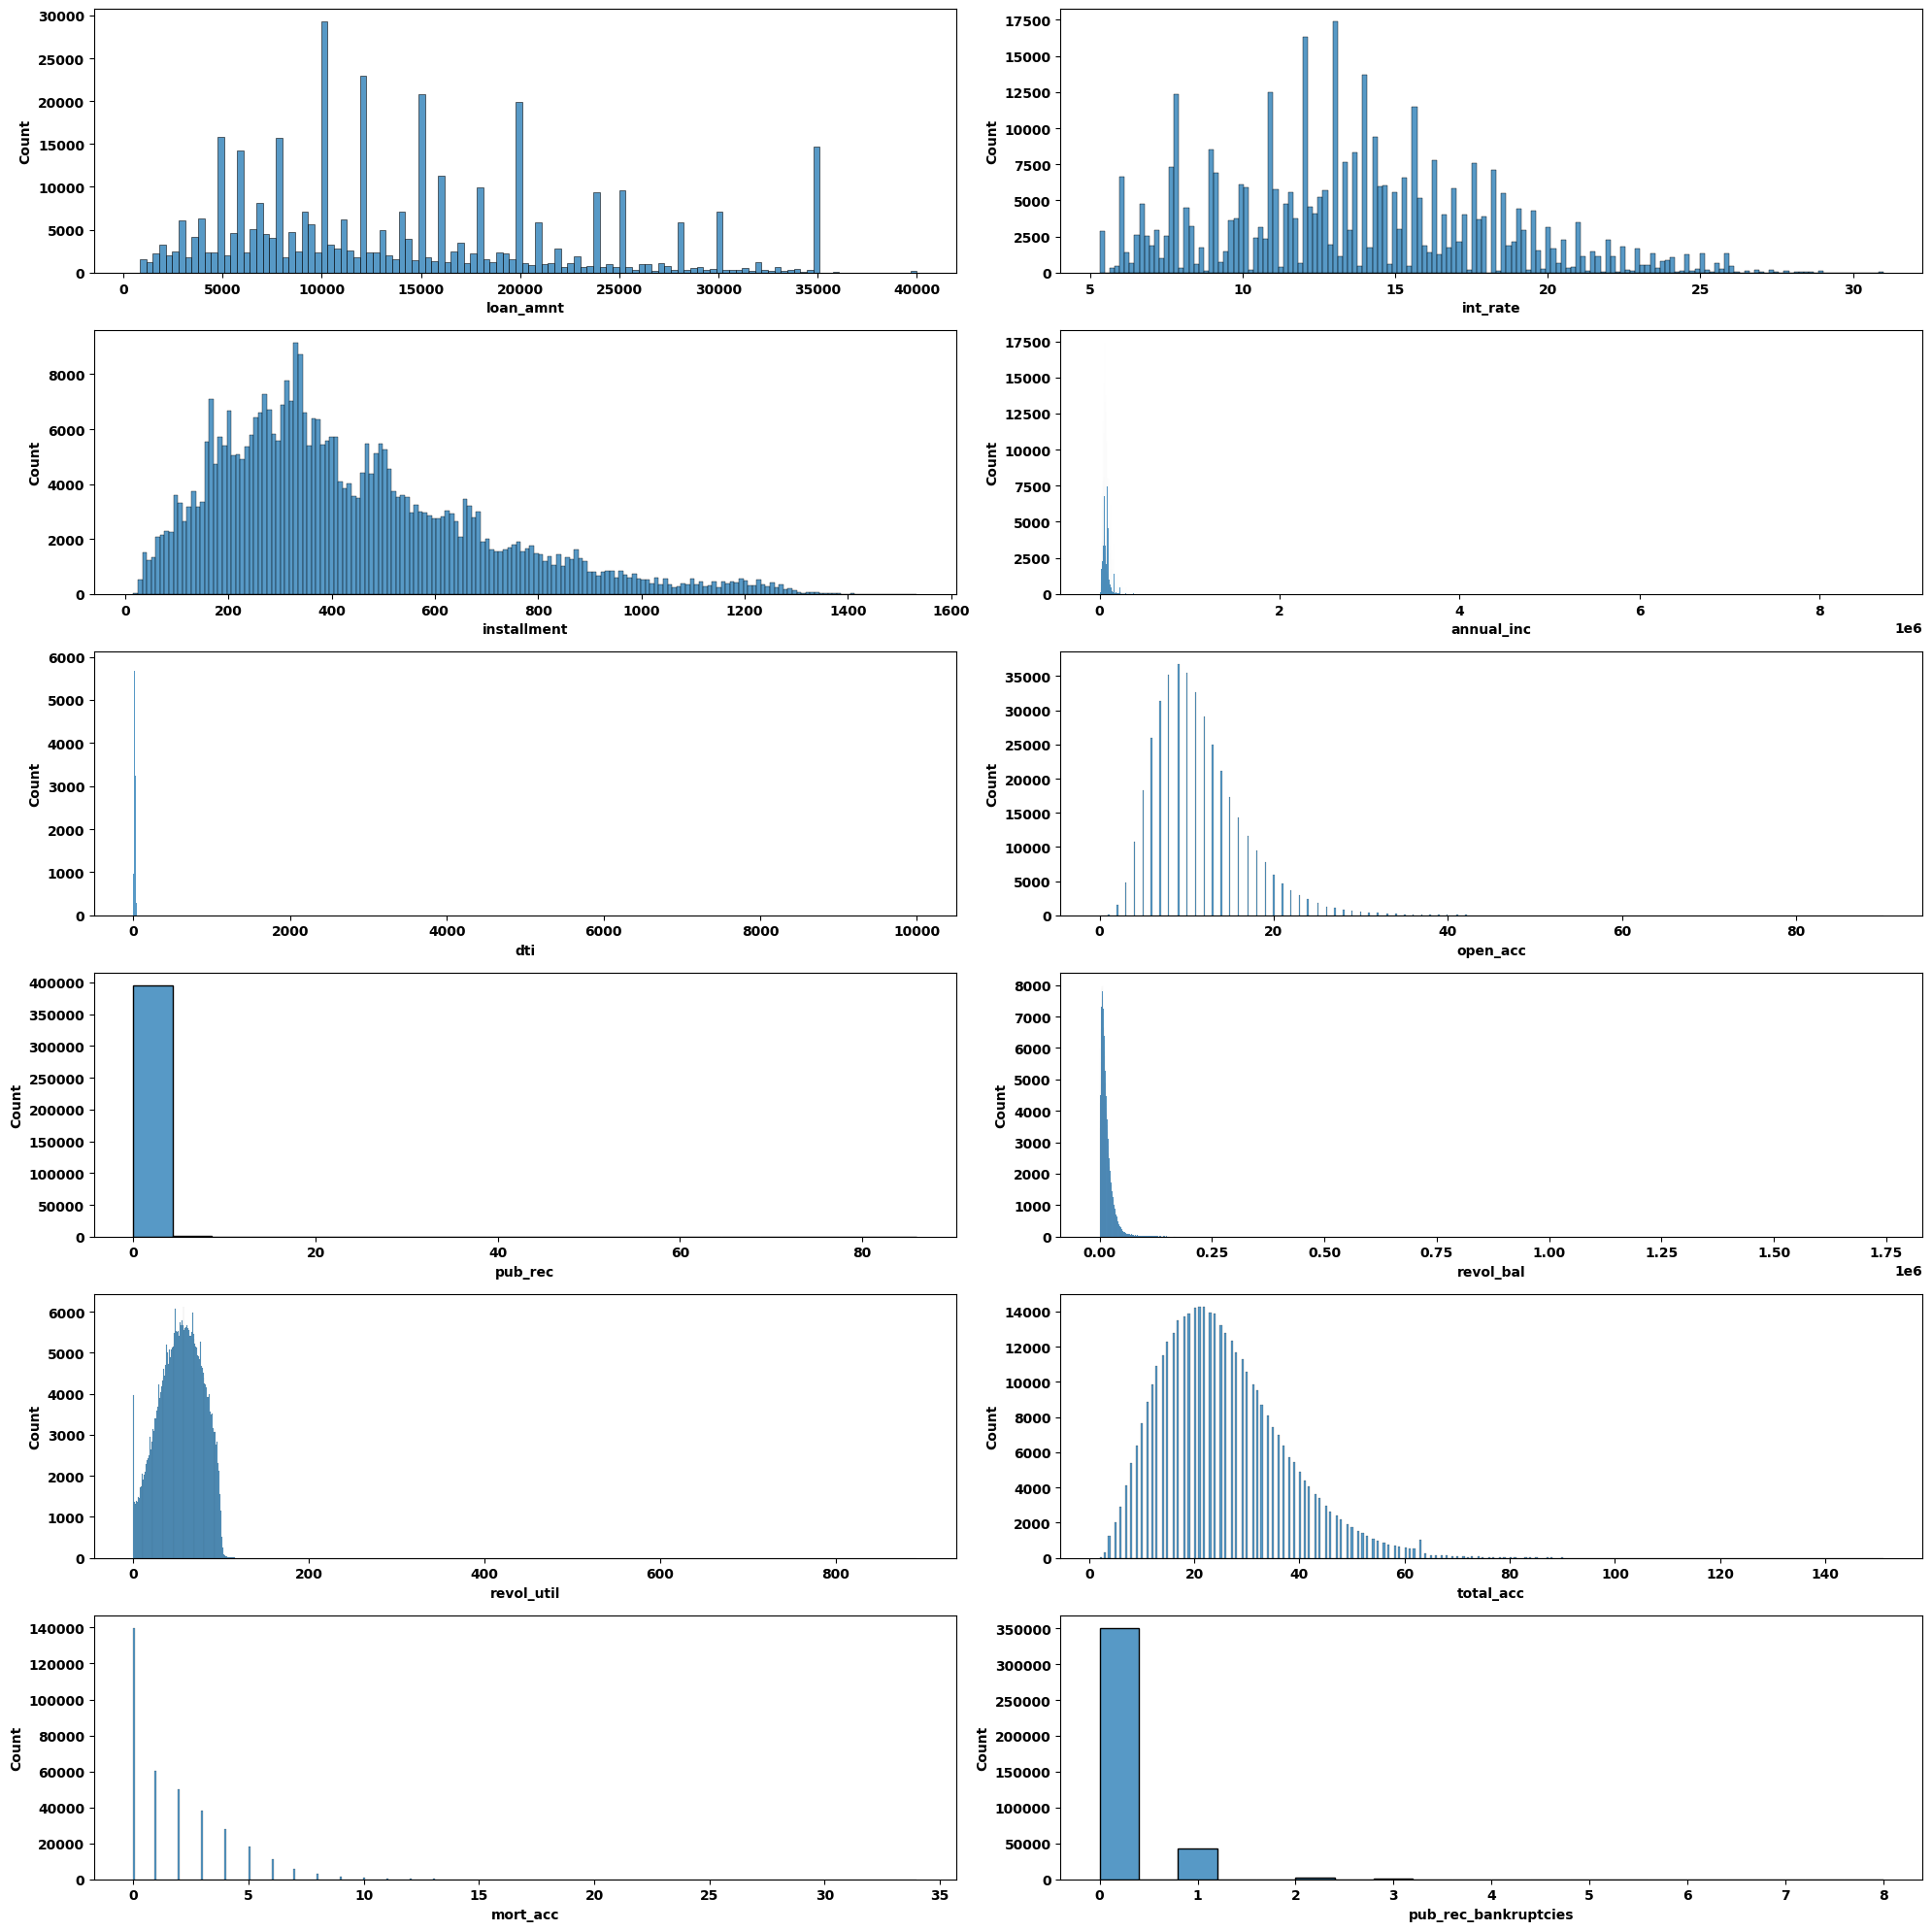

In [15]:
numeric_df = raw_df.select_dtypes("number")

plot_num = 1

plt.subplots(6,2, figsize=(20,20))

for col in numeric_df.columns:
    plt.subplot(6,2,plot_num)
    sns.histplot(raw_df[col])
    plot_num +=1

plt.tight_layout()
plt.show()

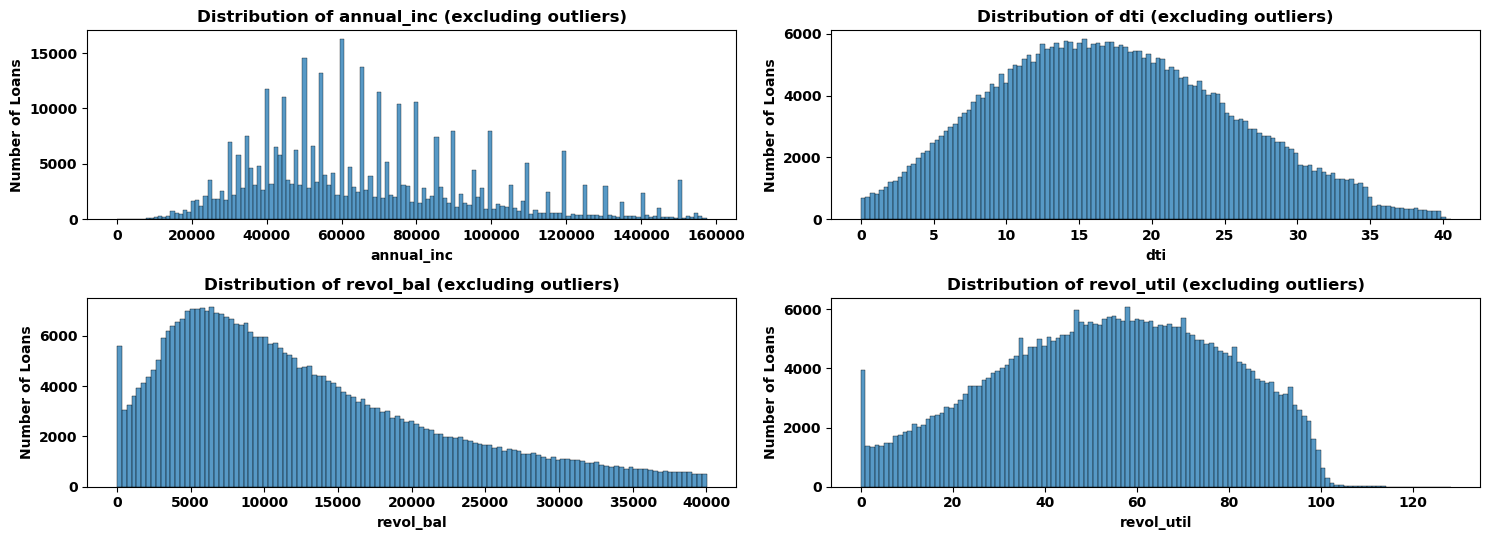

In [77]:
cols_with_outliers = ['annual_inc', 'dti', 'revol_bal', 'revol_util']

plt.subplots(2,2, figsize=(15,5.5))
plot_num = 1

for col in cols_with_outliers:
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]

    plt.subplot(2, 2, plot_num)  # Adjust the subplot grid as needed
    
    sns.histplot(filtered_data[col])
    plt.title(f"Distribution of {col} (excluding outliers)")
    plt.xlabel(col)
    plt.ylabel("Number of Loans")

    plot_num += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

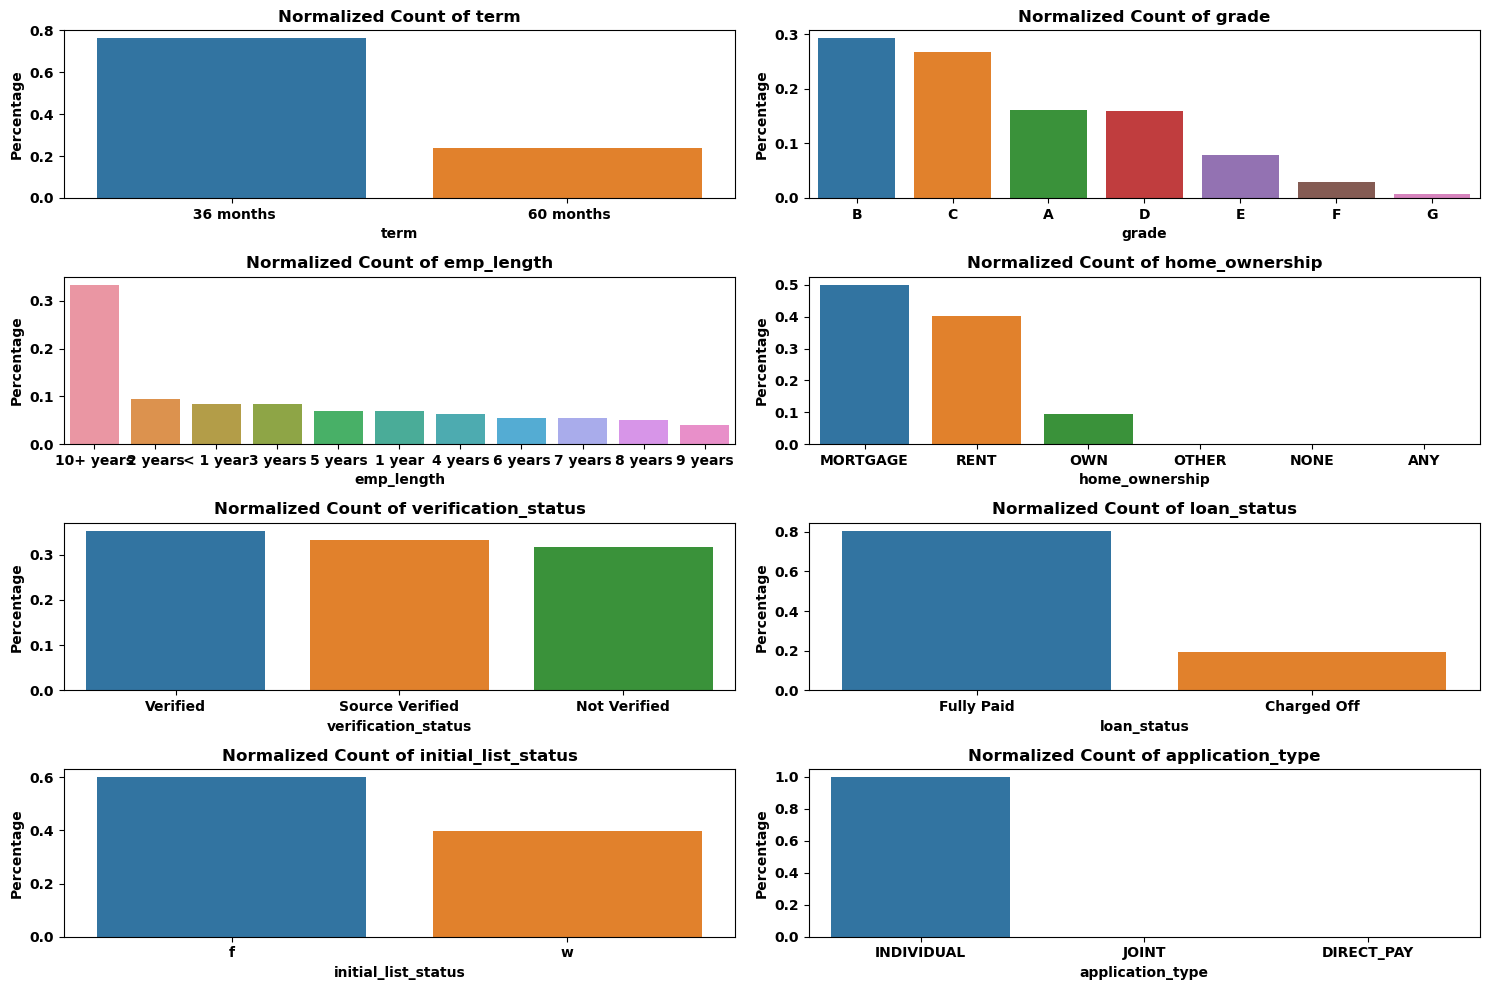

In [17]:
#categorical_cols = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
                  #'issue_d', 'loan_status','purpose','title','initial_list_status','application_type']

categorical_cols = ['term','grade','emp_length','home_ownership','verification_status','loan_status',
                   'initial_list_status','application_type']

plot_num = 1

plt.subplots(4, 2, figsize=(15, 10))

for col in categorical_cols:
    plt.subplot(4, 2, plot_num)
    
    # Calculate normalized counts manually
    counts = raw_df[col].value_counts(normalize=True)
    
    # Plot the bar chart
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.title(f"Normalized Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plot_num += 1

plt.tight_layout()
plt.show()

In [18]:
categorical_df = raw_df.select_dtypes("object")
categorical_df.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


Most loans are in the range of 11% to 16%. The loans above 21% taper off.

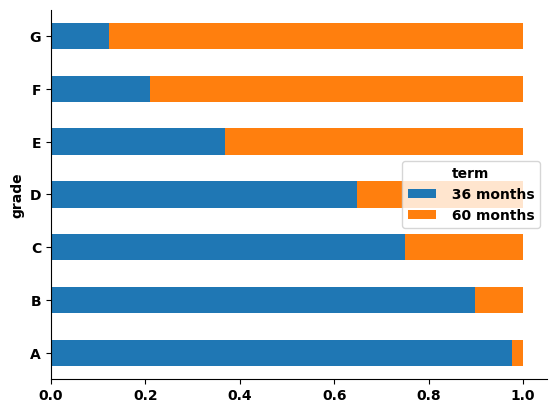

In [19]:
rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True)
sns.despine()

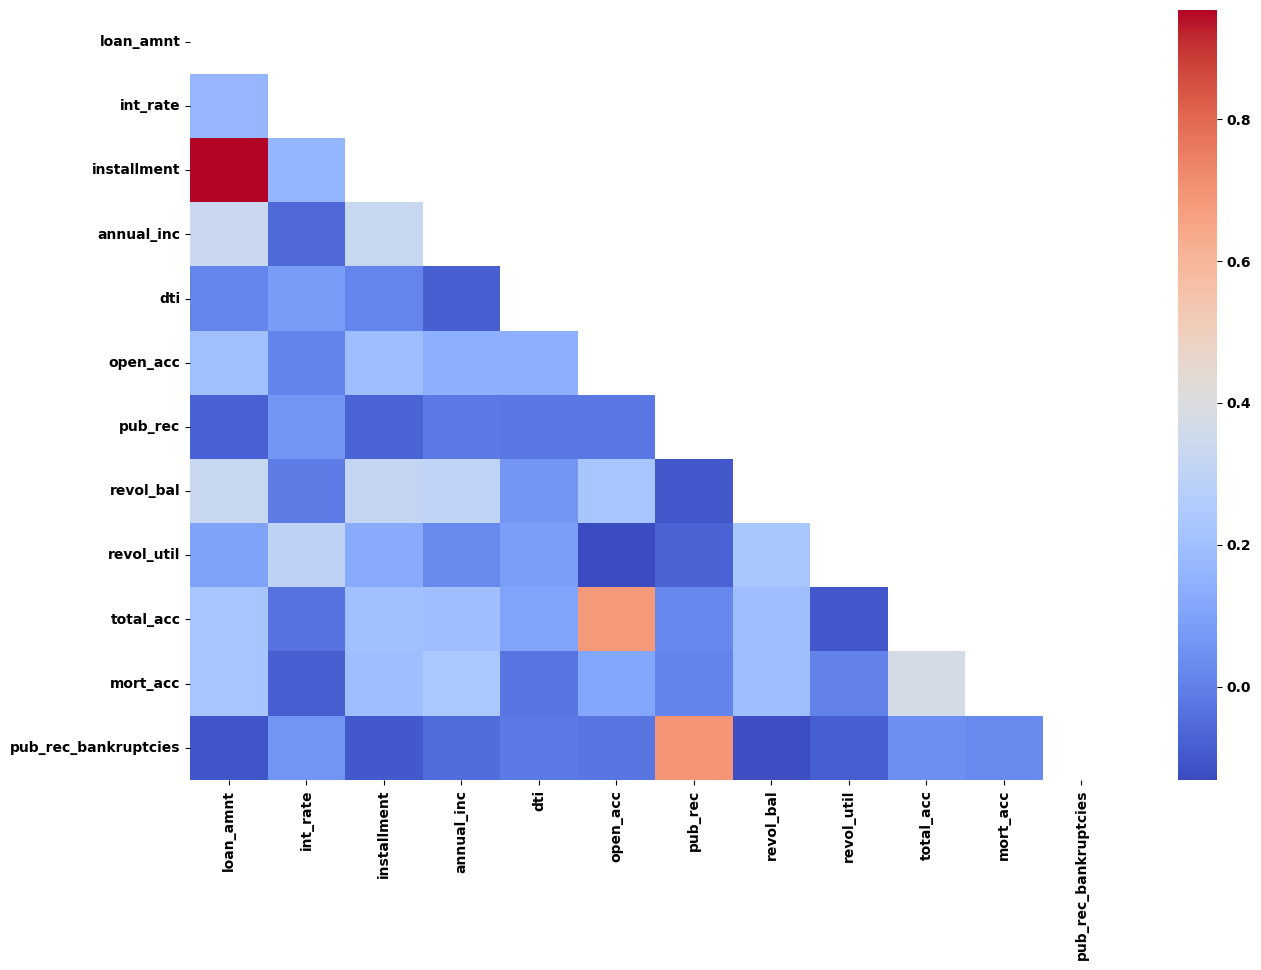

In [22]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.corr(), cmap="coolwarm", annot=True, mask=mask)

plt.show()


In [23]:
raw_df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (loan_status)

## Exploring columns with null values

We had earlier seem that some of the columns have null values. Let's calculate the percentages of nulls in these columns.

In [24]:
#Extract columns with null values and calcuate the percentages.
columns_with_nulls = (raw_df.isna().sum(axis=0) * 100 / raw_df.shape[0]).round(2).loc[lambda x: x != 0]

# print percentage of nulls in the columns having null values
print(columns_with_nulls.sort_values(ascending = True))

revol_util              0.07
pub_rec_bankruptcies    0.14
title                   0.44
emp_length              4.62
emp_title               5.79
mort_acc                9.54
dtype: float64


`revol_util` and `pub_rec_bankruptcies` have small percentage of null values and we can remove the rows in these columns that have `revol_util` and `pub_rec_bankruptcies` as null values

In [25]:
raw_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [26]:
raw_df.shape

(395219, 27)

Let us look at `title` column. We observe that it has values similar to the `purpose` column. 

In [27]:
raw_df[['purpose','title']].sample(5)

,purpose,title
315310,debt_consolidation,Debt consolidation
30662,debt_consolidation,Debt consolidation
389052,credit_card,Credit card refinancing
190730,credit_card,Credit card refinancing
370358,credit_card,Credit card refinancing


Based on above, we may proceed to remove the column `title`

In [28]:
# number of unique values on `emp_length` column
raw_df['emp_length'].nunique() 

11

In [29]:
cross_tab = pd.crosstab(index=raw_df['emp_length'], columns=raw_df['loan_status'], normalize='index').round(2)

# print normalised porportions for each category of emp_length
print(cross_tab)


loan_status  Charged Off  Fully Paid
emp_length                          
1 year              0.20        0.80
10+ years           0.18        0.82
2 years             0.19        0.81
3 years             0.20        0.80
4 years             0.19        0.81
5 years             0.19        0.81
6 years             0.19        0.81
7 years             0.19        0.81
8 years             0.20        0.80
9 years             0.20        0.80
< 1 year            0.21        0.79


We notice that for every category of emp_length, the charged off and full paid values maintain the same proportion. This implies that  emp_length does not influence loan_status. Therefore, we may remove the `emp_length` column.

In [30]:
raw_df['emp_title'].nunique() #Check the number of unique 'employee title' values

172650

We may proceed to delete this column `emp_title` as there are too many unique and we would not be able to convert this numerical column.

In [31]:
raw_df[['purpose','title']].sample(5)

,purpose,title
101366,debt_consolidation,Its About Time
385838,credit_card,Credit card refinancing
109958,debt_consolidation,Debt Consolidation
31633,car,Car financing
119445,debt_consolidation,Debt consolidation


In [32]:
raw_df.corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
Name: mort_acc, dtype: float64

In [33]:
raw_df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [34]:
raw_df[raw_df['mort_acc'].notna()].corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
Name: mort_acc, dtype: float64

The highest correlation is observed for `total_acc`, but the same is not high enough for us to be able to delete the same.

 We observe there is no common ratio. There is some relation between `mort_acc` and `loan_status`. So, we may not delete the column and instead proceed with imputation by filling with some value. We can use the fillna() method for imputation of `mort_acc'. 

As we explored all the columns which have null values, we proceed with dropping all columns with null values, except for `mort_acc`

In [35]:
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)



In [36]:
raw_df.isnull().sum() # checking for nulls

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22881
emp_length              18290
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1754
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [37]:
#drop the columns 'title','emp_length','revol_util','pub_rec_bankruptcies','emp_title' 
raw_df = raw_df.drop(columns = ['title','emp_length','emp_title'])

In [38]:
raw_df.shape

(395219, 24)

After dropping some columns, let us extract categorical columns again from raw_df

In [39]:
raw_df = raw_df.drop(columns = ['sub_grade'])

In [99]:
import re

# Assuming raw_df is your original dataframe
# Extracting Month and Year from earliest_cr_line
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])
raw_df['earliest_cr_line_month'] = raw_df['earliest_cr_line'].dt.month
raw_df['earliest_cr_line_year'] = raw_df['earliest_cr_line'].dt.year

# Extracting State Code from address
state_pattern = r',\s(\w{2})\s\d+'
state_extract = raw_df['address'].str.extract(state_pattern)
raw_df['address_state_code'] = state_extract[0]

# Extracting Month and Year from issue_d
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['issue_d_month'] = raw_df['issue_d'].dt.month
raw_df['issue_d_year'] = raw_df['issue_d'].dt.year

# Calculate Annual_Income/Loan Amount
raw_df['annual_inc_loan_amnt_ratio'] = raw_df['annual_inc'] / raw_df['loan_amnt']

# Calculate Annual_Income/Interest Rate
raw_df['annual_inc_int_rate_ratio'] = raw_df['annual_inc'] / raw_df['int_rate']

# Calculate Debt using dti and Annual_Income
raw_df['debt'] = raw_df['dti'] * raw_df['annual_inc']

# Display the updated dataframe
print(raw_df.head())


   loan_amnt        term  int_rate  installment grade home_ownership  \
0    10000.0   36 months     11.44       329.48     B           RENT   
1     8000.0   36 months     11.99       265.68     B       MORTGAGE   
2    15600.0   36 months     10.49       506.97     B           RENT   
3     7200.0   36 months      6.49       220.65     A           RENT   
4    24375.0   60 months     17.27       609.33     C       MORTGAGE   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    117000.0        Not Verified 2015-01-01   Fully Paid            vacation   
1     65000.0        Not Verified 2015-01-01   Fully Paid  debt_consolidation   
2     43057.0     Source Verified 2015-01-01   Fully Paid         credit_card   
3     54000.0        Not Verified 2014-11-01   Fully Paid         credit_card   
4     55000.0            Verified 2013-04-01  Charged Off         credit_card   

     dti earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  \
0  26.24 

In [40]:
columns_to_drop = ['address', 'earliest_cr_line', 'issue_d']
raw_df.drop(columns=columns_to_drop, inplace=True)

In [41]:
# Map 'Charged Off' to 0 and 'Fully Paid' to 1 in the 'loan_status' column
raw_df['loan_status'] = raw_df['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

# Display the updated dataframe
print(raw_df.head())

   loan_amnt        term  int_rate  installment grade home_ownership  \
0    10000.0   36 months     11.44       329.48     B           RENT   
1     8000.0   36 months     11.99       265.68     B       MORTGAGE   
2    15600.0   36 months     10.49       506.97     B           RENT   
3     7200.0   36 months      6.49       220.65     A           RENT   
4    24375.0   60 months     17.27       609.33     C       MORTGAGE   

   annual_inc verification_status  loan_status             purpose    dti  \
0    117000.0        Not Verified            1            vacation  26.24   
1     65000.0        Not Verified            1  debt_consolidation  22.05   
2     43057.0     Source Verified            1         credit_card  12.79   
3     54000.0        Not Verified            1         credit_card   2.60   
4     55000.0            Verified            0         credit_card  33.95   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0      16.0      0.0    36

In [42]:
categorical_df = raw_df.select_dtypes("object")


In [43]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)

# Now, concatenate the numerical columns with the original dataframe

processed_df = pd.concat([raw_df, dummies_df], axis=1)

# Drop the original categorical columns if needed
processed_df = processed_df.drop(categorical_df.columns, axis=1)



# Now, processed_df contains the original numerical columns and the one-hot encoded categorical columns

In [44]:
raw_df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,RENT,117000.0,Not Verified,1,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,RENT,43057.0,Source Verified,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,RENT,54000.0,Not Verified,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,MORTGAGE,55000.0,Verified,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [68]:
processed_df.head()

,loan_amnt,int_rate,annual_inc,loan_status,dti,pub_rec,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,117000.0,1,26.24,0.0,25.0,0.0,0.0,0,1,0
1,8000.0,11.99,65000.0,1,22.05,0.0,27.0,3.0,0.0,0,1,0
2,15600.0,10.49,43057.0,1,12.79,0.0,26.0,0.0,0.0,0,1,0
3,7200.0,6.49,54000.0,1,2.60,0.0,13.0,0.0,0.0,0,1,0
4,24375.0,17.27,55000.0,0,33.95,0.0,43.0,1.0,0.0,1,1,0


In [54]:
processed_df = processed_df.drop(columns=["revol_bal","installment","revol_util","open_acc","grade_B","grade_C","grade_D","grade_E","purpose_moving","purpose_other","purpose_renewable_energy","purpose_small_business","purpose_vacation","purpose_wedding"])

In [64]:
processed_df = processed_df.drop(columns = ["grade_F","grade_G","home_ownership_MORTGAGE","home_ownership_NONE","home_ownership_OTHER","home_ownership_OWN","home_ownership_RENT","verification_status_Source Verified","verification_status_Verified","purpose_credit_card","purpose_debt_consolidation","purpose_educational","purpose_home_improvement","purpose_house","purpose_major_purchase","purpose_medical","initial_list_status_w"])

In [65]:
processed_df.shape

(395219, 12)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Select features (X) and target variable (y)
X = processed_df.drop('loan_status', axis=1)  #  'loan_status' is target variable
y = processed_df['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform all columns in training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform all columns in testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [48]:
processed_df.shape

(395219, 43)

In [59]:
processed_df[processed_df['loan_status'] == 1].shape[0]/processed_df[['loan_status']].shape[0]

0.8038479931379817

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8055

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.06      0.11     23155
           1       0.81      0.99      0.89     95411

    accuracy                           0.81    118566
   macro avg       0.66      0.52      0.50    118566
weighted avg       0.75      0.81      0.74    118566



accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

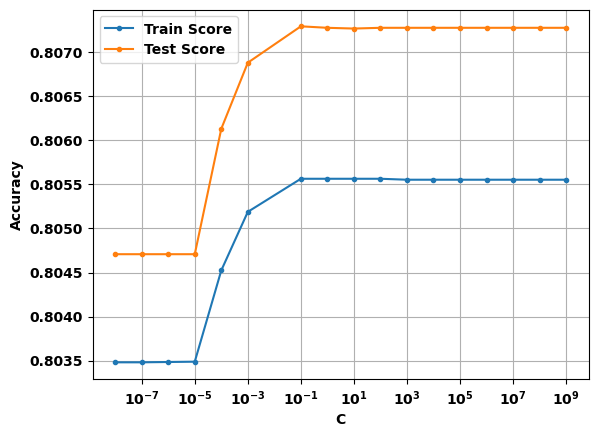

In [121]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    my_logreg = LogisticRegression(C=C_value, random_state=1)

    # Fit the model on the training set
    my_logreg.fit(X_train_scaled, y_train)

    # Append training and testing scores to the respective lists
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    test_scores.append(my_logreg.score(X_test_scaled, y_test))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

Accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

In [125]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your training data
# Assuming class 0 is the minority class
class_weights = {0: 2, 1: 1}  # You can adjust the weights based on the imbalance ratio

model = LogisticRegression(class_weight=class_weights)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 2, 1: 1})

In [126]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.7816

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.30      0.35     23155
           1       0.84      0.90      0.87     95411

    accuracy                           0.78    118566
   macro avg       0.63      0.60      0.61    118566
weighted avg       0.76      0.78      0.77    118566



In [132]:
processed_df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,annual_inc_loan_amnt_ratio,annual_inc_int_rate_ratio,debt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,address_state_code_AL,address_state_code_AR,address_state_code_AZ,address_state_code_CA,address_state_code_CO,address_state_code_CT,address_state_code_DC,address_state_code_DE,address_state_code_FL,address_state_code_GA,address_state_code_HI,address_state_code_IA,address_state_code_ID,address_state_code_IL,address_state_code_IN,address_state_code_KS,address_state_code_KY,address_state_code_LA,address_state_code_MA,address_state_code_MD,address_state_code_ME,address_state_code_MI,address_state_code_MN,address_state_code_MO,address_state_code_MS,address_state_code_MT,address_state_code_NC,address_state_code_ND,address_state_code_NE,address_state_code_NH,address_state_code_NJ,address_state_code_NM,address_state_code_NV,address_state_code_NY,address_state_code_OH,address_state_code_OK,address_state_code_OR,address_state_code_PA,address_state_code_RI,address_state_code_SC,address_state_code_SD,address_state_code_TN,address_state_code_TX,address_state_code_UT,address_state_code_VA,address_state_code_VT,address_state_code_WA,address_state_code_WI,address_state_code_WV,address_state_code_WY
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,6,1990,1,2015,11.700000,10227.272727,3070080.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,7,2004,1,2015,8.125000,5421.184320,1433250.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,8,2007,1,2015,2.760064,4104.575786,550699.03,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,9,2006,11,2014,7.500000,8320.493066,140400.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,3,1999,4,2013,2.256410,3184.713376,1867250.00,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [137]:
X_train_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,annual_inc_loan_amnt_ratio,annual_inc_int_rate_ratio,debt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,address_state_code_AL,address_state_code_AR,address_state_code_AZ,address_state_code_CA,address_state_code_CO,address_state_code_CT,address_state_code_DC,address_state_code_DE,address_state_code_FL,address_state_code_GA,address_state_code_HI,address_state_code_IA,address_state_code_ID,address_state_code_IL,address_state_code_IN,address_state_code_KS,address_state_code_KY,address_state_code_LA,address_state_code_MA,address_state_code_MD,address_state_code_ME,address_state_code_MI,address_state_code_MN,address_state_code_MO,address_state_code_MS,address_state_code_MT,address_state_code_NC,address_state_code_ND,address_state_code_NE,address_state_code_NH,address_state_code_NJ,address_state_code_NM,address_state_code_NV,address_state_code_NY,address_state_code_OH,address_state_code_OK,address_state_code_OR,address_state_code_PA,address_state_code_RI,address_state_code_SC,address_state_code_SD,address_state_code_TN,address_state_code_TX,address_state_code_UT,address_state_code_VA,address_state_code_VT,address_state_code_WA,address_state_code_WI,address_state_code_WV,address_state_code_WY
0,-0.790590,1.081930,-0.632022,-0.484298,-0.044131,-0.451566,-0.329849,-0.490465,0.494979,-1.295670,-0.887252,-0.342528,-1.092909,1.963328,1.298991,0.927210,-0.130103,-0.557497,-0.620225,-0.559531,-0.642731,-0.604767,-0.437313,3.389271,-0.174871,-0.087834,-1.001378,-0.008503,-0.015909,-0.324709,1.215618,1.416652,-0.737963,-0.513860,-1.208255,-0.025938,-0.254106,-0.07494,-0.150783,-0.104297,-0.083729,-0.237188,-0.029095,8.303625,-0.078398,-0.067856,-0.816465,0.042423,-0.032727,-0.132328,-0.133483,-0.132667,-0.132257,-0.1322,-0.133089,-0.13254,-0.132172,-0.13435,-0.135003,-0.134196,-0.133061,-0.134475,-0.134084,-0.134001,-0.134419,-0.132878,-0.134154,-0.134084,-0.133061,-0.133146,-0.132667,-0.133244,-0.133398,-0.133398,-0.132243,-0.134154,-0.1322,-0.133609,-0.13254,-0.134628,-0.13285,-0.134461,-0.134433,-0.132991,-0.133679,-0.133328,-0.132934,-0.134112,-0.133075,7.536084,-0.132413,-0.134517,-0.133061,-0.134614,-0.134586,-0.134266,-0.134112,-0.13414,-0.133188
1,-0.973054,-0.781736,-0.950744,-0.530715,0.205855,-0.062516,-0.329849,-0.229014,0.642212,-0.456288,-0.398154,-0.342528,-0.801870,-0.258860,0.715149,0.245309,-0.042818,-0.329566,-0.419248,-0.559531,1.555862,-0.604767,-0.437313,-0.295049,-0.174871,-0.087834,-1.001378,-0.008503,-0.015909,3.079682,-0.822627,-0.705890,1.355081,1.946055,-1.208255,-0.025938,-0.254106,-0.07494,-0.150783,-0.104297,-0.083729,-0.237188,-0.029095,-0.120429,-0.078398,-0.067856,1.224793,0.042423,-0.032727,-0.132328,-0.133483,-0.132667,-0.132257,-0.1322,7.513753,-0.13254,-0.132172,-0.13435,-0.135003,-0.134196,-0.133061,-0.134475,-0.134084,-0.134001,-0.134419,-0.132878,-0.134154,-0.134084,-0.133061,-0.133146,-0.132667,-0.133244,-0.133398,-0.133398,-0.132243,-0.134154,-0.1322,-0.133609,-0.13254,-0.134628,-0.13285,-0.134461,-0.134433,-0.132991,-0.133679,-0.133328,-0.132934,-0.134112,-0.133075,-0.132695,-0.132413,-0.134517,-0.133061,-0.134614,-0.134586,-0.134266,-0.134112,-0.13414,-0.133188
2,-0.135513,-1.286758,-0.102109,-0.221270,0.393104,-0.451566,-0.329849,-0.589841,-1.619449,-0.036597,-0.887252,-0.342528,1.526447,-1.786615,-0

In [87]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the SMOTE class with desired sampling strategy (50:50 balance)
sampling_strategy = 1.0  # Adjust this to achieve a 50:50 balance
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_resampled)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
classification_report_str = classification_report(y_test_resampled, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.6453

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64     95411
           1       0.64      0.66      0.65     95411

    accuracy                           0.65    190822
   macro avg       0.65      0.65      0.65    190822
weighted avg       0.65      0.65      0.65    190822



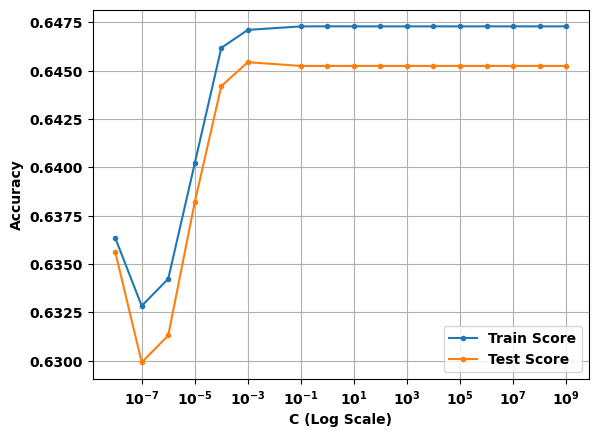

In [88]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=1)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

     # Make predictions on the training set
    y_train_pred = model.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test_resampled)

    # Append testing scores to the respective list
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test_resampled, y_pred))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

Accuracy: 0.8015

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.10      0.17     23155
           1       0.82      0.97      0.89     95411

    accuracy                           0.80    118566
   macro avg       0.64      0.54      0.53    118566
weighted avg       0.75      0.80      0.75    118566



In [84]:
# Assuming 'y' is your output variable
class_counts = np.bincount(y_train_resampled)
class_0_count = class_counts[0]  # Count of class 0
class_1_count = class_counts[1]  # Count of class 1

print(f"Percentage of Class 0 : {class_0_count * 100 /(class_0_count+class_1_count)}")
print(f"Percentage of Class 1 : {class_1_count * 100 /(class_0_count+class_1_count)}")

Percentage of Class 0 : 50.0
Percentage of Class 1 : 50.0


In [85]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.7535

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.32      0.33     23155
           1       0.84      0.86      0.85     95411

    accuracy                           0.75    118566
   macro avg       0.60      0.59      0.59    118566
weighted avg       0.74      0.75      0.75    118566



In [86]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

n_estimators_range = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Iterate over different values of n_estimators
for n_estimators_value in n_estimators_range:
    # Initialize Random Forest Classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, random_state=42)
    
    # Fit the model on the training set
    rf_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = rf_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = rf_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='.')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='.')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


KeyboardInterrupt: 

In [1]:
print("hello 12:01")

hello 12:01
